# Exception Handling

In [1]:
try:
    x = eee/0
    print(x)
except Exception:
    print("Exception")

Exception


In [2]:
try:
    x = 10/0
    print(x)
except ZeroDivisionError:
    print("Divide by zero error")

Divide by zero error


In [3]:
try:
    fh = open("test11.txt", "r")
    x = 10/0
except IOError:
    print('file not found exception')
except ZeroDivisionError:
    print("Zero division exception:")

file not found exception


In [4]:
try:
    x1 =(10/0) 
    print("value of x is ",x1)
except Exception:
    # this part will be executed when there is an exception
    print("there is an exception in the operation")
finally:
    # this part will be executed always(It does not worry about whether there is exception or not)
    print("Well Done!")

there is an exception in the operation
Well Done!


In [5]:
try:
    x2 =(10/2) 
except Exception:
    # this part will be exevuted when there is an exception
    print("there is an exception in the operation")
else:
    # If there is no exception, this block will execute
    print("Value of x is",x2)
    print("Well Done!")

Value of x is 5.0
Well Done!


### Note : You cannot use else clause along with a finally clause

### File Operations

In [6]:
# file operations
f = open('tezt.txt','w')
f.write('hai')
f.close()

In [7]:
# file operations
f = open('tezt.txt','w')
x = "hello boy","hai guys","welcome to python lab","how are you"
for i in x:
    f.write(i)
    #print('\n')
f.close()

In [8]:
f = open('tezt.txt','r')
print(f.read())
f.close()

hello boyhai guyswelcome to python labhow are you


# Retrieving webpages using urllib

In [9]:
import urllib
from urllib import request

In [10]:
fhand = request.urlopen('http://www.py4inf.com/code/romeo.txt')
#fhand = request.urlopen('http://www.py4inf.com')
for line in fhand:
    #print(line)
    #print(line.strip())
    print(line.strip().decode('utf-8'))

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


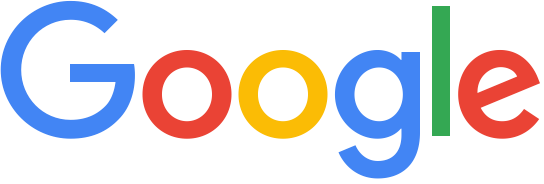

In [11]:
from IPython.display import Image
Image("https://www.google.co.in/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png")

In [12]:
import requests
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

In [13]:
page.status_code

200

### here 200 means that the webpage downloaded successfully. In general code starting with a 2 means success, and starting with a 4 or a 5 indicates an error.

In [14]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [16]:
soup

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [17]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


### Weather forcast website : http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.WYMPLrZLddg

In [18]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content,'html.parser')
seven_day = soup.find(id="seven-day-forecast")
#print(seven_day)
#print(seven_day.prettify)
forecast_items = seven_day.find_all(class_="tombstone-container")
#print(forecast_items)
tonight = forecast_items[7]
print(tonight)
#print(tonight.prettify())
#print(forecast_items)

<div class="tombstone-container">
<p class="period-name">Thursday<br/>Night</p>
<p><img alt="Thursday Night: Partly cloudy, with a low around 55." class="forecast-icon" src="newimages/medium/nsct.png" title="Thursday Night: Partly cloudy, with a low around 55."/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 55 °F</p></div>


In [19]:
forecast_items[7]

<div class="tombstone-container">
<p class="period-name">Thursday<br/>Night</p>
<p><img alt="Thursday Night: Partly cloudy, with a low around 55." class="forecast-icon" src="newimages/medium/nsct.png" title="Thursday Night: Partly cloudy, with a low around 55."/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 55 °F</p></div>

In [20]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()

print(period)
print(short_desc)
print(temp)

ThursdayNight
Partly Cloudy
Low: 55 °F


In [21]:
img = tonight.find("img")
desc = img['title']
print(desc)

Thursday Night: Partly cloudy, with a low around 55.


In [22]:
#Exract some more data
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Today',
 'Tonight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday']

In [23]:
descs = [sd.get_text() for sd in seven_day.select(".tombstone-container")]
print(descs)

['\nToday\nPatchy Fogthen MostlySunnyHigh: 68 °F', '\nTonight\nPatchy FogLow: 58 °F', '\nTuesday\nPatchy Fogthen SunnyHigh: 67 °F', '\nTuesdayNight\nPartly CloudyLow: 56 °F', '\nWednesday\nMostly SunnyHigh: 66 °F', '\nWednesdayNight\nPartly CloudyLow: 56 °F', '\nThursday\nMostly SunnyHigh: 68 °F', '\nThursdayNight\nPartly CloudyLow: 55 °F', '\nFriday\nMostly SunnyHigh: 68 °F']


In [24]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
print(short_descs)

['Patchy Fogthen MostlySunny', 'Patchy Fog', 'Patchy Fogthen Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Partly Cloudy', 'Mostly Sunny']


In [25]:
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
print(temps)

['High: 68 °F', 'Low: 58 °F', 'High: 67 °F', 'Low: 56 °F', 'High: 66 °F', 'Low: 56 °F', 'High: 68 °F', 'Low: 55 °F', 'High: 68 °F']


In [26]:
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(descs)

['Today: Patchy fog before 11am.  Otherwise, mostly cloudy, then gradually becoming sunny, with a high near 68. West southwest wind 11 to 17 mph, with gusts as high as 23 mph. ', 'Tonight: Patchy fog after 11pm.  Otherwise, increasing clouds, with a low around 58. West wind 10 to 17 mph, with gusts as high as 23 mph. ', 'Tuesday: Patchy fog before 11am.  Otherwise, mostly cloudy, then gradually becoming sunny, with a high near 67. West wind 13 to 18 mph, with gusts as high as 24 mph. ', 'Tuesday Night: Partly cloudy, with a low around 56. West southwest wind 11 to 18 mph, with gusts as high as 24 mph. ', 'Wednesday: Mostly sunny, with a high near 66. West wind 9 to 18 mph, with gusts as high as 24 mph. ', 'Wednesday Night: Partly cloudy, with a low around 56.', 'Thursday: Mostly sunny, with a high near 68.', 'Thursday Night: Partly cloudy, with a low around 55.', 'Friday: Mostly sunny, with a high near 68.']


In [27]:
import pandas as pd
weather = pd.DataFrame({
    "Period": periods,
    "Short_description": short_descs,
    "Temperature": temps,
    "Description": descs
    })

In [28]:
weather

Description          Period  \
0  Today: Patchy fog before 11am.  Otherwise, mos...           Today   
1  Tonight: Patchy fog after 11pm.  Otherwise, in...         Tonight   
2  Tuesday: Patchy fog before 11am.  Otherwise, m...         Tuesday   
3  Tuesday Night: Partly cloudy, with a low aroun...    TuesdayNight   
4  Wednesday: Mostly sunny, with a high near 66. ...       Wednesday   
5  Wednesday Night: Partly cloudy, with a low aro...  WednesdayNight   
6       Thursday: Mostly sunny, with a high near 68.        Thursday   
7  Thursday Night: Partly cloudy, with a low arou...   ThursdayNight   
8         Friday: Mostly sunny, with a high near 68.          Friday   

            Short_description  Temperature  
0  Patchy Fogthen MostlySunny  High: 68 °F  
1                  Patchy Fog   Low: 58 °F  
2        Patchy Fogthen Sunny  High: 67 °F  
3               Partly Cloudy   Low: 56 °F  
4                Mostly Sunny  High: 66 °F  
5               Partly Cloudy   Low: 56 °F  
6                Mostly Sunny  High: 68 °F  
7               Partly Cloudy   Low: 55 °F  
8                Mostly Sunny  High: 68 °F

### http://www.cricbuzz.com/

In [29]:
page = requests.get("http://www.cricbuzz.com/cricket-schedule/series")

In [30]:
soup = BeautifulSoup(page.content,'html.parser')

In [31]:
print(soup.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script>
   var is_mobile = /symbian|tizen|midp|uc(web|browser)|MSIE (5.0|6.0|7.0|8.0)|tablet/i.test(navigator.userAgent);	if(is_mobile && window.location.hostname != "www1.cricbuzz.com") window.location.hostname = "m.cricbuzz.com";
  </script>
  <style>
   body{background:#E3E6E3; font-family: helvetica,"Segoe UI",Arial,sans-serif;color:#222;font-size:14px; line-height: 1.5; margin:0;}	body, .cb-comm-pg, .cb-hm-mid {min-height:1000px}	.container{width:980px;margin:0 auto;}	.page{max-width: 980px;margin: 0 auto;position: relative;}	.cb-col-8 {width:8%;}	.cb-col-10 {width:10%;}	.cb-col-14 {width:14%;}	.cb-col-16 {width:16%;}	.cb-col-20 {width:20%;}	.cb-col-25 {width:25%;}	.cb-col-27 {width:27%;}	.cb-col-33 {width:33%;}	.cb-col-40 {width:40%;}	.cb-col-46 {width:46%;}	.cb-col-47 {width:47%;}	.cb-col-50 {width:50%;}	.cb-col-60 {width:60%;}	.cb-col-66 {width:66%;}	.cb-col-6

In [32]:
matches = soup.find(".cb-col-16 cb-col text-bold cb-mnth div")
print(matches)

None


In [33]:
for match in matches.find_all(class_="cb-col-16 cb-col text-bold cb-mnth "):
    months = match.get_text()
months

AttributeError: 'NoneType' object has no attribute 'find_all'

In [66]:
import pandas as pd
cricket = pd.DataFrame({
    #"Duration": durations,
    #"Month": months
    #"Series": series
    })
print(cricket)

Empty DataFrame
Columns: []
Index: []


In [57]:
for match in matches.find(class_="cb-col-16 cb-col text-bold cb-mnth "):
    print(match)

May 2015


In [ ]:
op = pd.DataFrame({"Duration": [''], "Month": [''], "Series": ['']})
op

In [58]:
for match in matches.find_all(class_="cb-col-16 cb-col text-bold cb-mnth "):
    months = match.get_text()
for match in matches.find_all(class_="text-black text-hvr-underline"):
    series = match.get_text()
for match in matches.find_all(class_="text-gray cb-font-12"):
    durations = match.get_text()

In [59]:
months

'May 2015'

In [60]:
series

'ICC World Cricket League Championship, 2015-17'

In [61]:
durations

'May 15 - Oct 15'